In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import cv2



#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

Duplicate key in file PosixPath('/Users/k22120kk/.pyenv/versions/3.10.5/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 262 ('font.family:  sans-serif')


In [2]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../data/4回目/"
acc = pd.read_csv(fname+"acc.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

初期位置
椅子に座る
椅子から立つ
初期位置
テントに入る
テントで正座
テントから出る
初期位置


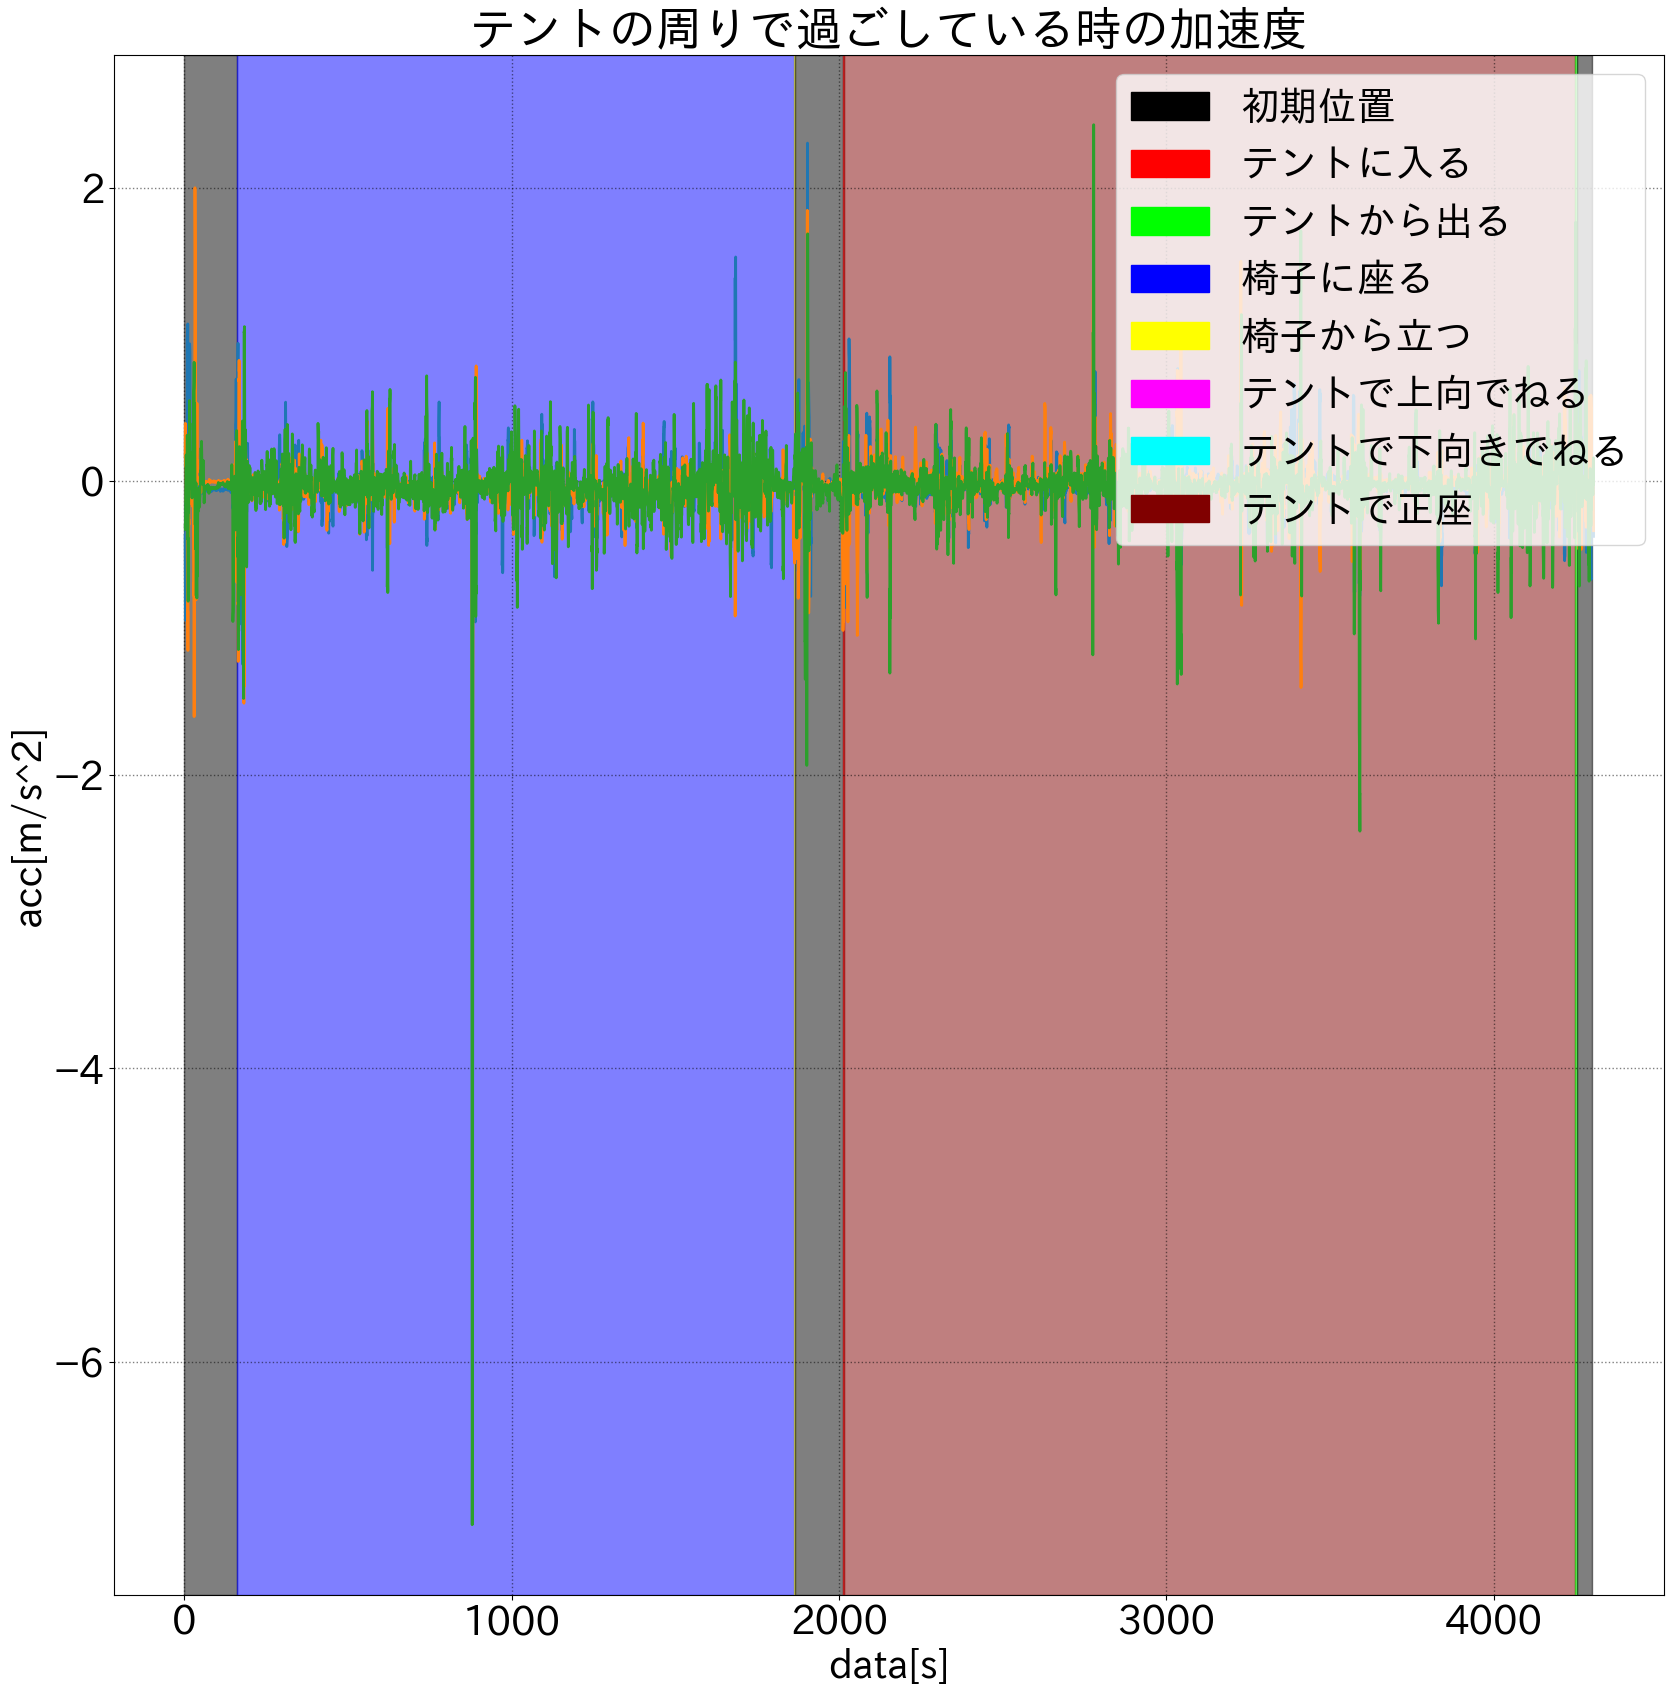

In [3]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("テントの周りで過ごしている時の加速度")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["x"].rolling(window=5).mean(),
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["z"].rolling(window=5).mean(),
    label="z軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["y"].rolling(window=5).mean(),
    label="y軸",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "初期位置": "#000000",
    "テントに入る": "#ff0000",
    "テントから出る": "#00ff00",
    "椅子に座る": "#0000ff",
    "椅子から立つ": "#ffff00",
    "テントで上向でねる": "#ff00ff",
    "テントで下向きでねる": "#00ffff",
    "テントで正座": "#800000"
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0]) / 1000
    end_time = (ans["time"][i + 1] - ans["time"][0]) / 1000 if i < len(ans) - 1 else (acc["time"].max() - ans["time"][0]) / 1000
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

In [4]:
# # content毎に分割して、BLEのデータをFFTしてみる
# # 椅子に座るだけ取得したデータを使う
# # ansデータを使って、椅子に座っているかどうかを判定する

# # 1. windowサイズ20データ分を用いて、FFTを行う

# window_size = 200
# for i in range(0, len(acc) - window_size, window_size):
#     # 1.1. windowサイズ20データ分を取得する
#     fft_acc_data = acc[i:i+window_size]   

#     print(f"window_data: {fft_acc_data}")

#     # print(f"fft_isu_data: {len(fft_isu_data)}")
#     # print(f"fft_tent_data: {len(fft_tent_data)}")

#     # fft_isu_dataをグラフ化する
#     ## ｘ軸を時間にする
#     ## y軸をrssiにする

#     # 2. データをグラフ化する
#     # 2.1. グラフのタイトルを設定する
#     plt.figure(figsize=(20, 20))
#     plt.title(f"加速度のデータ　{window_size}個分")
#     # 2.2. グラフのx軸のラベルを設定する
#     plt.xlabel("time(s)")
#     # 2.3. グラフのy軸のラベルを設定する


In [5]:
# # content毎に分割して、BLEのデータをFFTしてみる
# # 椅子に座るだけ取得したデータを使う
# # ansデータを使って、椅子に座っているかどうかを判定する

# # 1. windowサイズ20データ分を用いて、FFTを行う

# window_size = 200
# for i in range(0, len(acc) - window_size, window_size):
#     # 1.1. windowサイズ20データ分を取得する
#     fft_acc_data = acc[i:i+window_size]   

#     print(f"window_data: {fft_acc_data}")

#     # print(f"fft_isu_data: {len(fft_isu_data)}")
#     # print(f"fft_tent_data: {len(fft_tent_data)}")

#     # fft_isu_dataをグラフ化する
#     ## ｘ軸を時間にする
#     ## y軸をrssiにする

#     # 2. データをグラフ化する
#     # 2.1. グラフのタイトルを設定する
#     plt.figure(figsize=(20, 20))
#     plt.title(f"加速度のデータ　{window_size}個分")
#     # 2.2. グラフのx軸のラベルを設定する
#     plt.xlabel("time(s)")
#     # 2.3. グラフのy軸のラベルを設定する
#     plt.ylabel("acc (m/s^2))")
#     # 2.4. グラフのx軸の表示範囲を設定する
#     # plt.xlim(start_time, end_time)
#     # 2.5. グラフのy軸の表示範囲を設定する
#     # plt.ylim(-100, -40)
#     # 2.6. グラフにデータを追加する
#     plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["x"].rolling(window=10).mean(), label="x")
#     plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["y"].rolling(window=10).mean(), label="y")
#     plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["z"].rolling(window=10).mean(), label="z")



#     # 2.7. グラフに凡例を追加する
#     plt.legend()
#     # 2.8. グラフを表示する
#     plt.show()






0.001899828692546674
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
8174    0.102156
8175    0.097962
8176    0.179607
8177    0.200895
8178    0.436083
Length: 8179, dtype: float64
[  67374.49565962  185279.86306394  303185.23046827  421090.5978726
  538995.96527693  656901.33268126  774806.70008559  892712.06748991
 1010617.43489424 1128522.80229857 1246428.1697029  1364333.53710723
 1482238.90451155 1600144.27191588 1718049.63932021 1835955.00672454
 1953860.37412887 2071765.74153319 2189671.10893752 2307576.47634185
 2425481.84374618 2543387.21115051 2661292.57855484 2779197.94595916
 2897103.31336349 3015008.68076782 3132914.04817215 3250819.41557648
 3368724.7829808  3486630.15038513 3604535.51778946 3722440.88519379
 3840346.25259812 3958251.62000245 4076156.98740677 4194062.3548111 ]
            time  content
0  1688988447741     初期位置
1  1688988609269    椅子に座る
2  1688990309434   椅子から立つ
3  1688990314238     初期位置
4  168899046

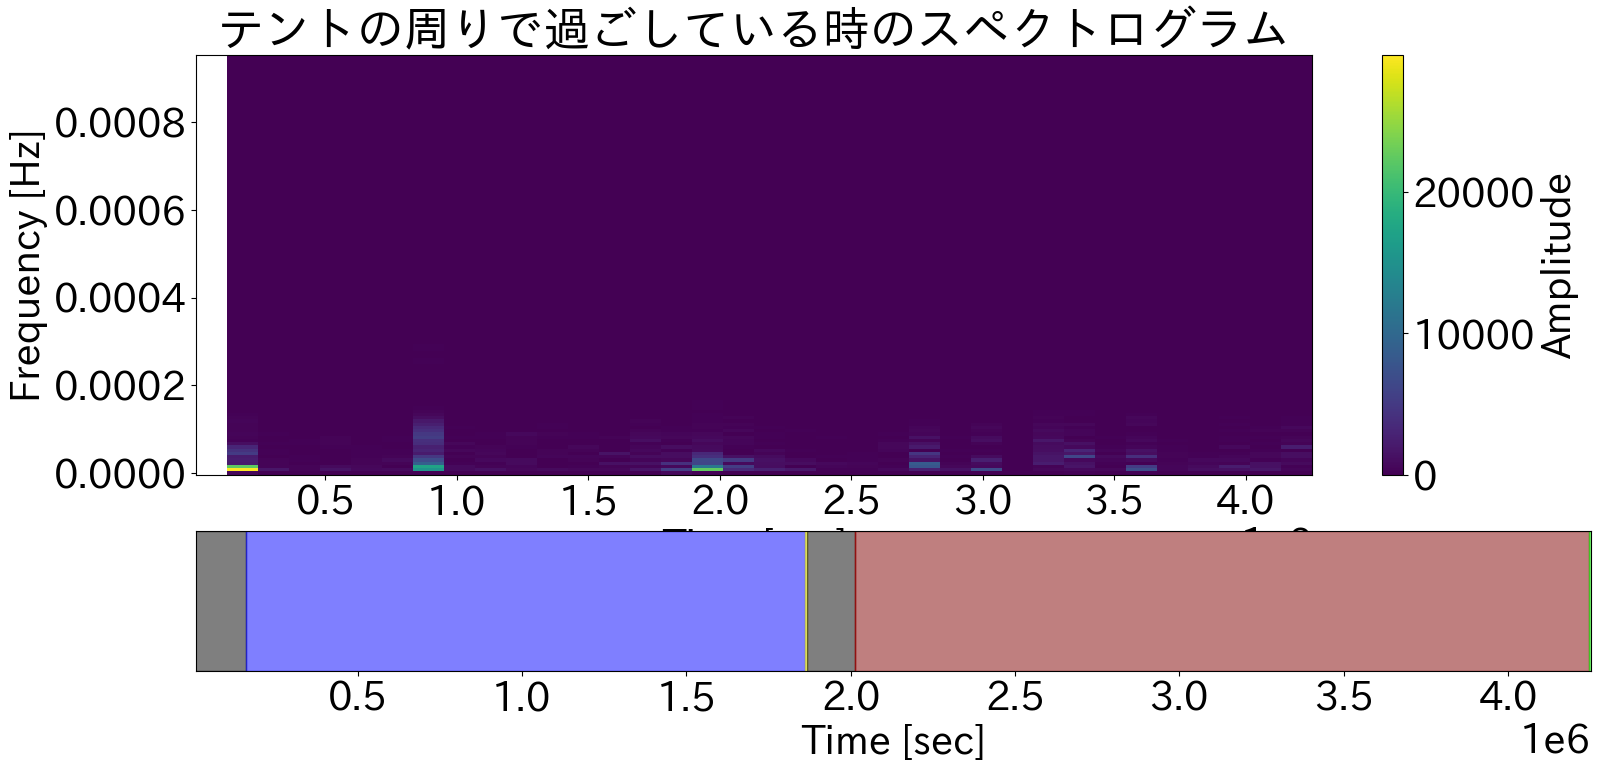

In [6]:
# サンプリング周波数を計算する関数
def calculate_sampling_frequency(data):
    time_stamps = [data_point for data_point in data]
    time_interval = time_stamps[-1] - time_stamps[0]
    sampling_frequency = 1 / (time_interval / len(data))
    return sampling_frequency


# 以下、元のコードからの続き
x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

fs = calculate_sampling_frequency(acc["time"])
norm = abs(norm_acc)

# スペクトログラム分析の実施
f, t, Sxx = signal.spectrogram(norm, fs)

print(fs)
print(norm)
print(t)

# サブプロットを作成
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# 画像を大きく表示する
fig.set_size_inches(18, 8)

# スペクトログラムをax1に表示
cax = ax1.pcolormesh(t, f, Sxx)
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
ax1.set_title("テントの周りで過ごしている時のスペクトログラム")
cbar1 = fig.colorbar(cax, ax=ax1)
cbar1.set_label("Amplitude")

print(ans)


content_colors = {
    "初期位置": "#000000",
    "テントに入る": "#ff0000",
    "テントから出る": "#00ff00",
    "椅子に座る": "#0000ff",
    "椅子から立つ": "#ffff00",
    "テントで上向でねる": "#ff00ff",
    "テントで下向きでねる": "#00ffff",
    "テントで正座": "#800000"
}

# 正解データをax2に表示
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0])
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0])
    else :
        end_time = (acc["time"].iloc[-1] - ans["time"][0])

    print(start_time, end_time)

    ax2.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

ax2.set_xlabel('Time [sec]')
ax2.set_yticks([])
ax2.set_xlim(ax1.get_xlim())

plt.show()
